In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# some constants
dx = 0.05
c = 1.0
k = 0.01
baselevel_rate = 0.01
num_steps = 1000000
Hstar = 1.0e-1
beta = 1
beta_bed = 1
beta_grains = 0.1
# alpha01 = 0.1
alpha1 = 2
# alpha10 = 10

In [10]:
# a function
def evolve_with_bedrock_and_abrasion(c, 
                                     k, 
                                     beta, 
                                     alpha, 
                                     dx=1, 
                                     Hstar=1.0, 
                                     baselevel_rate=0.01, 
                                     num_steps = 1000000):
    x = np.arange(0.0, 1.0 + dx, dx)
    H = Hstar + np.zeros(len(x))  # sediment thickness
    H[-1] = 0.0
    etab = -H
    eta = etab + H
    ero = np.zeros(len(x))  # bedrock erosion rate
    q = x  # discharge = distance downstream (first node is left edge of 0th cell)
    qs = np.zeros(len(x))  # first node is left edge of 0th cell
    dt = 0.2 * dx * dx / c  # time-step size

    for t in range(num_steps):
        eta[-1] -= baselevel_rate * dt  # lower baselevel
        etab[-1] = eta[-1]
        S = -np.diff(eta) / dx  # calc slope gradient
        efac = np.exp(-H / Hstar)
        
        # calc bed sed flux
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1]) # calc sediment flux
        
        # calc bedrock erosion from stream power
        ero_sp = efac[:-1] * (k * q[1:] * S)
        
        # calc bedrock erosion from abrasion
        ero_ab = efac[:-1] * (beta * qs[1:])
        
        # calc bedrock erosion rate from stream power and abrasion
        ero[:-1] = ero_sp + ero_ab
        
        # ero[:-1] = efac[:-1] * ((k * q[1:] * S) + (beta * qs[1:]))
        
        # calc change in bedrock elev
        etab[:-1] -= ero[:-1] * dt
        
        # H[:-1] += (ero[:-1] - (np.diff(qs) / dx)) * dt
        # H[:-1] += (ero[:-1] - (np.diff(qs) / dx) - (qs[1:] * beta * (1 - (alpha * efac[:-1])))) * dt
        
        # Add in alluvial thickness gained from stream power erosion + abrasion
        # H[:-1] += (-(np.diff(qs) / dx) - (qs[1:] * beta * (1 - (alpha * efac[:-1])))) * dt
        
        # grain attrition
        attrition = beta * qs[1:]
        
        # change in alluvial layer
        H[:-1] += (((alpha * efac[:-1])*((k * q[1:] * S) + (beta * qs[1:]))) - (np.diff(qs) / dx) - attrition) * dt
        
        # update elev
        eta[:-1] = etab[:-1] + H[:-1]

    return eta, etab, H, qs, ero_sp, ero_ab, ero, attrition, x

In [11]:
eta, etab, H, qs, ero_sp, ero_ab, ero, attrition, x = evolve_with_bedrock_and_abrasion(c, k, beta, alpha1, dx, Hstar, baselevel_rate)

In [12]:
# a function
def evolve_with_bedrock_and_abrasion_h(c, 
                                       k, 
                                       beta_bed, 
                                       beta_grains, 
                                       alpha, 
                                       dx=1, 
                                       Hstar=1.0, 
                                       baselevel_rate=0.01, 
                                       num_steps = 5000000):
    x = np.arange(0.0, 1.0 + dx, dx)
    H = Hstar + np.zeros(len(x))  # sediment thickness
    H[-1] = 0.0
    etab = -H
    eta = etab + H
    ero = np.zeros(len(x))  # bedrock erosion rate
    q = x  # discharge = distance downstream (first node is left edge of 0th cell)
    qs = np.zeros(len(x))  # first node is left edge of 0th cell
    dt = 0.2 * dx * dx / c  # time-step size

    for t in range(num_steps):
        eta[-1] -= baselevel_rate * dt  # lower baselevel
        etab[-1] = eta[-1]
        S = -np.diff(eta) / dx  # calc slope gradient
        efac = np.exp(-H / Hstar)
        
        # calc bed sed flux
        qs[1:] = c * q[1:] * S * (1.0 - efac[:-1]) # calc sediment flux
        
        # calc bedrock erosion from stream power
        ero_sp = efac[:-1] * (k * q[1:] * S)
        
        # calc bedrock erosion from abrasion
        ero_ab = efac[:-1] * (beta_bed * qs[1:])
        
        # calc bedrock erosion rate from stream power and abrasion
        ero[:-1] = ero_sp + ero_ab
        
        # ero[:-1] = efac[:-1] * ((k * q[1:] * S) + (beta * qs[1:]))
        
        # calc change in bedrock elev
        etab[:-1] -= ero[:-1] * dt
        
        # H[:-1] += (ero[:-1] - (np.diff(qs) / dx)) * dt
        # H[:-1] += (ero[:-1] - (np.diff(qs) / dx) - (qs[1:] * beta * (1 - (alpha * efac[:-1])))) * dt
        
        # Add in alluvial thickness gained from stream power erosion + abrasion
        # H[:-1] += (-(np.diff(qs) / dx) - (qs[1:] * beta * (1 - (alpha * efac[:-1])))) * dt
        
        # grain attrition
        attrition = beta_grains * qs[1:]
        
        # change in alluvial layer
        H[:-1] += (((alpha * efac[:-1])*((k * q[1:] * S) + (beta * qs[1:]))) - (np.diff(qs) / dx) - attrition) * dt
        
        # update elev
        eta[:-1] = etab[:-1] + H[:-1]

    return eta, etab, H, qs, ero_sp, ero_ab, ero, attrition, x

In [13]:
eta_h, etab_h, H_h, qs_h, ero_sp_h, ero_ab_h, ero_h, attrition_h, x_h = evolve_with_bedrock_and_abrasion_h(c, k, beta_bed, beta_grains, alpha1, dx, Hstar, baselevel_rate)

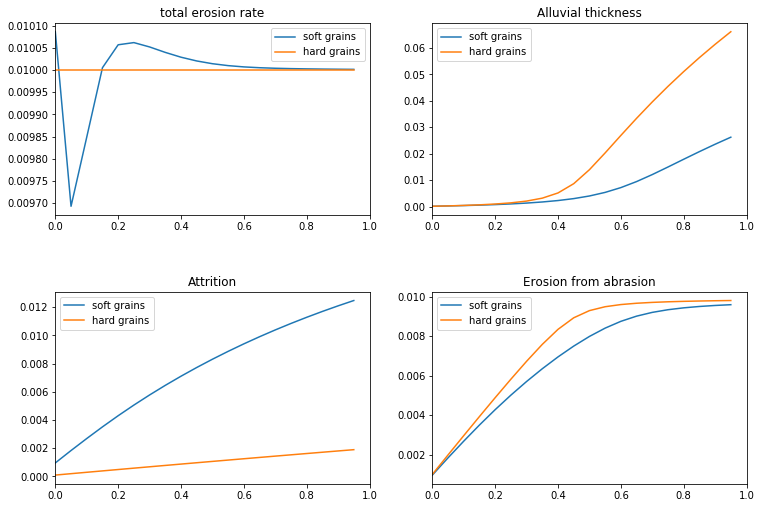

In [14]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (12, 8))
# fig.tight_layout(pad=3.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)

ax1.plot(x[:-1], ero[:-1], label = 'soft grains')
ax1.plot(x_h[:-1], ero_h[:-1], label = 'hard grains')
ax1.set_title('total erosion rate')
# ax1.yaxis.set_ticklabels([])
ax1.set_xlim(0, 1)
ax1.legend()

ax2.plot(x[:-1], H[:-1], label = 'soft grains')
ax2.plot(x_h[:-1], H_h[:-1], label = 'hard grains')
ax2.set_title('Alluvial thickness')
# ax2.yaxis.set_ticklabels([])
ax2.set_xlim(0, 1)
ax2.legend()

ax3.plot(x[:-1], attrition, label = 'soft grains')
ax3.plot(x_h[:-1], attrition_h, label = 'hard grains')
ax3.set_title('Attrition')
# ax3.yaxis.set_ticklabels([])
ax3.set_xlim(0, 1)
ax3.legend()

ax4.plot(x[:-1], ero_ab, label = 'soft grains')
ax4.plot(x_h[:-1], ero_ab_h, label = 'hard grains')
ax4.set_title('Erosion from abrasion')
# ax4.yaxis.set_ticklabels([])
ax4.set_xlim(0, 1)
ax4.legend()